In [62]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plot
import numpy as np

In [63]:
import pandas as pd

In [77]:
et = pd.read_csv("genuine_elapsed_times.csv", sep=';', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

In [96]:
for i in range(len(et)):
    et.at[i, 'read_speed'] = et.mb_per_process[i] * et.nb_processes[i] / et.read_time[i]
    et.at[i, 'write_speed'] = et.mb_per_process[i] * et.nb_processes[i] / et.write_time[i]

In [97]:
def plot_speeds():
    r_s, w_s, o_s = [], [], []
    for i in range(8):
        data = et[(et.nb_processes == i+1)]
        o_s.append(np.mean(data.max_bandwidth))
        r_s.append(np.mean(data.read_speed))
        w_s.append(np.mean(data.write_speed))
    plot.plot([i+1 for i in range(8)], o_s, "-", label='overall_bw')
    plot.plot([i+1 for i in range(8)], r_s, "-", label='read_bw')
    plot.plot([i+1 for i in range(8)], w_s, "-", label='write_bw')

    plot.xlabel("Number of processes")
    plot.ylabel("Bandwidth mean (in MB/s)")
    plot.legend(loc='best')

def plot_time():
    r_t, w_t, o_t = [], [], []
    for i in range(8):
        data = et[(et.nb_processes == i+1)].sum()
        o_t.append(data.overall_time)
        r_t.append(data.read_time)
        w_t.append(data.write_time)
    plot.plot([i+1 for i in range(8)], o_t, "-", label='overall_time')
    plot.plot([i+1 for i in range(8)], r_t, "-", label='read_time')
    plot.plot([i+1 for i in range(8)], w_t, "-", label='write_time')

    plot.xlabel("Number of processes")
    plot.ylabel("Total time (in s)")
    plot.legend(loc='best')

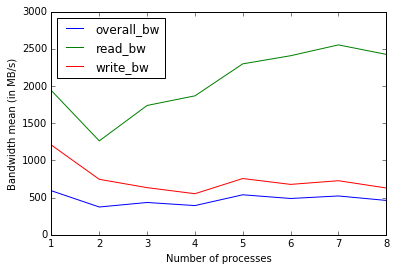

In [98]:
plot_speeds()

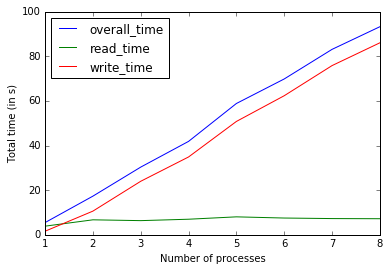

In [99]:
plot_time()